# Titanic Analysis

Project Plan


- Undestand the nature of the data .info() .describe()
- Histograms and boxplots
- Value counts (for catergorical data)
- Missing data. fillna(0)
- Correlation between metrics 
- Explore interesting themes 
    - Are wealthy more likley to survive ?
    - Test whether location that you left from matter?
    - Test whether ticket prices effected survival rate? 
    - Young and wealthy variable?
- Feature Engineering 
- Preprocess data together or use a transformer? 
    - Use label for train and test 
- Scaling
- Model Baseline
- Model various hyperparameters
- Model comparison with Cross Validation 
- Make predictions


# Importing Libaries and Data

In [11]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [12]:
#Split into test and train data
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0

#Remove the survived attribute
test['Survived'] = np.NaN

#Create a combined set
titanic = pd.concat([training,test])
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# Undestanding the nature of the data

In [13]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
training.shape

(891, 13)

In [15]:
test.shape

(418, 13)

In [16]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [17]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [18]:
tit_num = training[["Age","SibSp","Parch","Fare"]] #histograms as numeric data
tit_cater = training[["Sex","Ticket","Cabin","Embarked", "Pclass","Survived"]] #Value Counts as catergorical

## Numeric Data

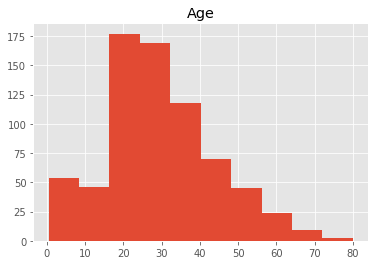

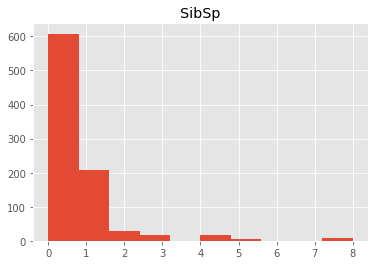

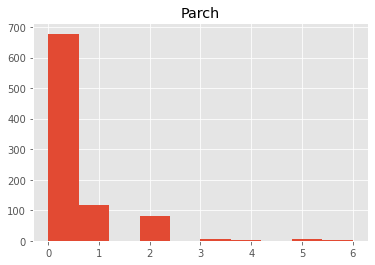

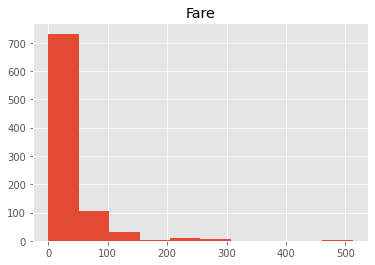

In [19]:
for i in tit_num: 
    plt.hist(tit_num[i])
    plt.title(i)
    plt.show()

Perhaps we should take the non-normal distributions and consider normalizing them ?

- We may want to normalise Fare as there is a big skew and a lot of catergories in the x axis

- The rest is okay as few enough catergories in x axis

### Correlations

In [20]:
tit_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


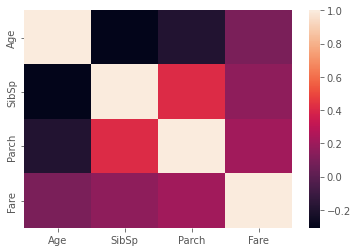

In [21]:
import seaborn as sns 
sns.heatmap(tit_num.corr())

- Familys travel together. Red for parents and siblings  
- Age and number of children has a low correlation

Helps us understand relationships. 
If we are using regression we want to avoid multi colinearity (two variables that are two corelated and effect model)

In [22]:
#Compare survival rate across age, SibSp, Parch, and Fare
pd.pivot_table(training,index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

#What are the values for survival 

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Initial ideas
1. If you are younger, more likely to survive 
2. If you paid a higher fare, you are more likely to survive
3. If you are a child and have parents more likely to survive 
4. If you have siblings, you are less liely to survive

## Catergorical Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

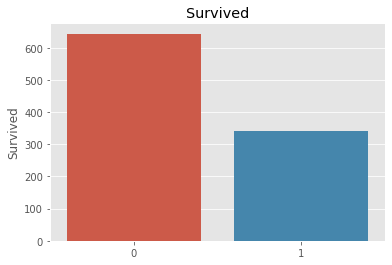

In [23]:
tit_cater = training[['Sex','Ticket','Cabin','Embarked', 'Pclass','Survived']]
for i in tit_cater:
    sns.barplot(tit_cater[i].value_counts().index,tit_cater[i].value_counts()).set_title(i)
    
# loop didnt work :/

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex')

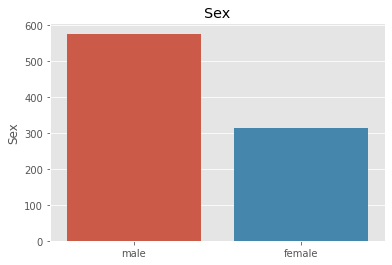

In [24]:
sns.barplot(tit_cater['Sex'].value_counts().index,tit_cater['Sex'].value_counts()).set_title('Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ticket')

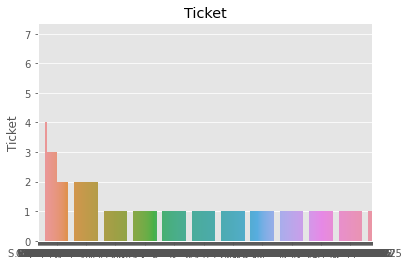

In [25]:
sns.barplot(tit_cater['Ticket'].value_counts().index,tit_cater['Ticket'].value_counts()).set_title('Ticket')
#Two many columns. Not very helpful visually

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cabin')

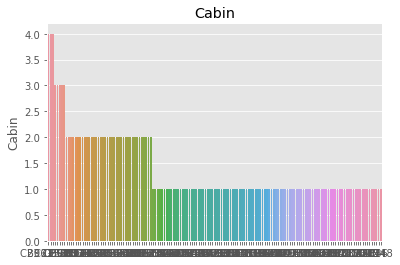

In [26]:
sns.barplot(tit_cater['Cabin'].value_counts().index,tit_cater['Cabin'].value_counts()).set_title('Cabin')

#cabin number

#Two many columns. Not very helpful visually

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked')

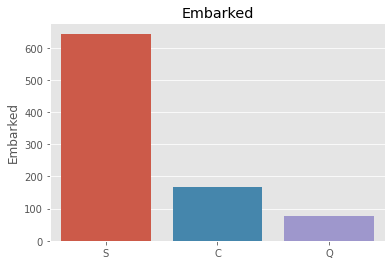

In [27]:
sns.barplot(tit_cater['Embarked'].value_counts().index,tit_cater['Embarked'].value_counts()).set_title('Embarked')

#S = Southampton
#C = Queenstown
#Q = Cherbourg

#Most people embarked from Southampton

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pclass')

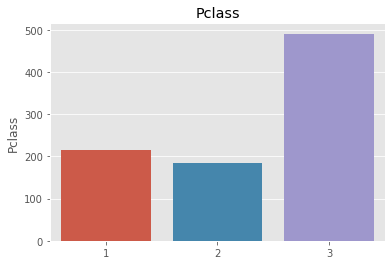

In [28]:
sns.barplot(tit_cater['Pclass'].value_counts().index,tit_cater['Pclass'].value_counts()).set_title('Pclass')

#1st second or 3rd class

#Passengers were mainly 3rd clas

In [29]:
#Compare survival rate across catergorical values
pd.pivot_table(training,index = 'Survived', columns = 'Pclass', values = 'Ticket',aggfunc = 'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
pd.pivot_table(training,index = 'Survived', columns = 'Sex', values = 'Ticket',aggfunc = 'count')

#'Women and children first'

Sex,female,male
Survived,,
0,81,468
1,233,109


In [31]:
pd.pivot_table(titanic,index = 'Survived', columns = 'Embarked', values = 'Ticket',aggfunc = 'count')

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


# Feature Engineering

Cabin and Ticket has too many columns. Not very helpful. We want to simplify this. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cabin')

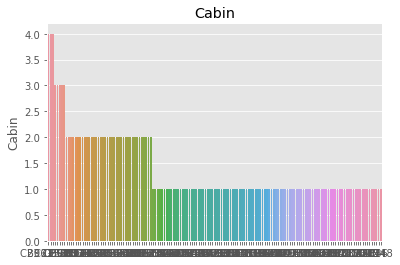

In [32]:
sns.barplot(tit_cater['Cabin'].value_counts().index,tit_cater['Cabin'].value_counts()).set_title('Cabin')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ticket')

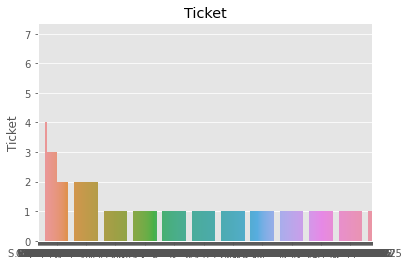

In [33]:
sns.barplot(tit_cater['Ticket'].value_counts().index,tit_cater['Ticket'].value_counts()).set_title('Ticket')

## Methodology 

- Cabin - Simplify cabins (evaluated if cabinn letter (cabin_adv) or the purchase of the tickets across multiple cabins (cabin_multiple) impacted survival)

- Do different tickets impact survival rates?

- Does a persons title relate to survival rates?


1. Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of the tickets across multiple cabins (cabin_multiple) impacted survival)

In [34]:
tit_cater.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [35]:
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [36]:
pd.pivot_table(training,index = 'Survived', columns = 'cabin_multiple', values = 'Ticket',aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [37]:
#create catergories based on the cabin letter (n stands for null)
#treat null values as its own catergory 

training['cabin_adv'] = training.Cabin.apply(lambda x:str(x)[0])

In [38]:
#comparing survival rate by cabin 
training['cabin_adv'].value_counts()

#n is n/a

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [39]:
pd.pivot_table(training,index = 'Survived', columns = 'cabin_adv', values = 'Name',aggfunc = 'count')

# a lot in the n/a column did not survive 

#Those who did, did genberally survive

# this feature engineering dropped the number of tickets to analyse from a lot to 9

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


2. Do different tickets impact survival rates

In [40]:
training['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [41]:
#Undestand ticket values better 
#numeric vs non numeric
training['numeric_tickets'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace(',','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [42]:
training['numeric_tickets'].value_counts()

1    661
0    230
Name: numeric_tickets, dtype: int64

In [43]:
pd.set_option('max_rows',None)
training['ticket_letters'].value_counts()

#doesnt really offer anything

0            665
pc            60
c.a.          27
stono2.       18
a5            10
w.c.           9
scparis        9
ca.            8
sotono.q.      8
a5.            7
sotonoq        7
ca             6
f.c.c.         5
c              5
s.o.c.         5
a4.            4
a.5.           4
s.o.p.p.       3
pp             3
a4             3
scah           2
sotono2        2
s.c.paris      2
ppp            2
wep            2
scahbasle      1
f.c.           1
s.w.pp         1
as             1
s.o.p.         1
sc             1
scow           1
swpp           1
wc             1
fa             1
w.e.p.         1
soc            1
s.p.           1
s.c.a.4.       1
c.a.soton      1
Name: ticket_letters, dtype: int64

In [44]:
pd.pivot_table(training,index = 'Survived', columns = 'numeric_tickets', values = 'Ticket',aggfunc = 'count')

numeric_tickets,0,1
Survived,,
0,142,407
1,88,254


In [45]:
pd.pivot_table(training,index = 'Survived', columns = 'ticket_letters', values = 'Ticket',aggfunc = 'count')

ticket_letters,0,a.5.,a4,a4.,a5,a5.,as,c,c.a.,c.a.soton,...,soc,sotono.q.,sotono2,sotonoq,stono2.,swpp,w.c.,w.e.p.,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,4.0,3.0,4.0,9.0,6.0,1.0,3.0,14.0,1.0,...,NaN,7.0,2.0,6.0,10.0,NaN,8.0,1.0,1.0,1.0
1,255.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,13.0,NaN,...,1.0,1.0,NaN,1.0,8.0,1.0,1.0,NaN,NaN,1.0


In [46]:
#Doesnt offer any value. values are fairly similar

3. Does a persons title relate to survival rates?

In [47]:
training.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [48]:
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [49]:
#Displays some useful information

# Data Preproccesing for the model

Drop null values from Embarked

In [50]:
titanic['Embarked'].dropna()
titanic['Fare'].fillna(titanic.Fare.mean(), inplace=True)
titanic['Age'].fillna(titanic.Age.mean(), inplace=True)

Create the additional componants we made in the feature engineering exercise

In [51]:
titanic['cabin_multiple'] = titanic.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
titanic['cabin_adv'] = titanic.Cabin.apply(lambda x: str(x)[0])
titanic['numeric_ticket'] = titanic.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic['ticket_letters'] = titanic.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
titanic['name_title'] = titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


Include only relevant variables (exclude things like name and passenger ID so we have a reasonable amount of features are model can deal with)

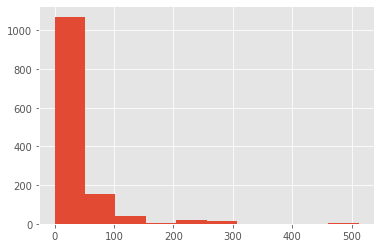

In [52]:
titanic['Fare'].hist()

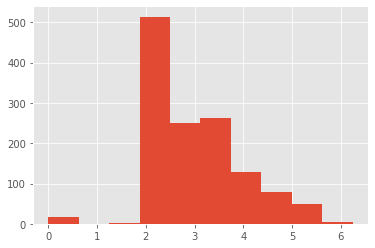

In [53]:
#Log for fare as data is very skewed to the left, need to normalise
import numpy as np
titanic['log_fare']=np.log(titanic.Fare+1) #cannot log(0)
titanic['log_fare'].hist()

In [54]:
#convert Pclass to string
titanic.Pclass=titanic['Pclass'].astype(str)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title,log_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr,2.110213
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs,4.280593
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss,2.188856
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs,3.990834
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr,2.202765


In [55]:
data = pd.get_dummies(titanic[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','log_fare','cabin_multiple','numeric_ticket','name_title','train_test']])

#create dummy variables from catergorie


## Split the data into Training and Testing Data

In [56]:
#Split to train test again
X_train = data[data.train_test == 1].drop(['train_test'], axis =1)
X_test = data[data.train_test == 0].drop(['train_test'], axis =1)

In [57]:
y_train = titanic[titanic.train_test==1].Survived
y_train.shape

(891,)

## Scaling the data

In [58]:
#Scale the data so all values are lower than 1

from sklearn.preprocessing import StandardScaler
scale = StandardScaler() #initialise scaler

data_scaled = data.copy() #Copy data set so values greater than 1 can be scaled

#fit scaler and transform dataset

data_scaled[['Age','SibSp','Parch','log_fare']]=scale.fit_transform(data_scaled[['Age','SibSp','Parch','log_fare']]) 
data_scaled.head()

,Age,SibSp,Parch,log_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.611972,0.481288,-0.445,-0.898323,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.630431,0.481288,-0.445,1.343689,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.301371,-0.479087,-0.445,-0.817085,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.397481,0.481288,-0.445,1.044367,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.397481,-0.479087,-0.445,-0.802717,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [59]:
X_train_scaled = data_scaled[data_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = data_scaled[data_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = titanic[titanic.train_test==1].Survived

# Model Building

In [60]:
#import Classiification models

from sklearn.model_selection import cross_val_score
from sklearn .naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Basic Models

### 1. Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB 

In [62]:
gnb = GaussianNB()

#Fit to the model

gnb.fit(X_train_scaled,
       y_train)

GaussianNB()

In [63]:
#Predict y from X_test data, using used_features

y_pred = gnb.predict(X_train)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [64]:
#Assess the quality of the model

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [66]:
classification_report(y_train,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.62      0.07      0.12       549\n         1.0       0.38      0.93      0.54       342\n\n    accuracy                           0.40       891\n   macro avg       0.50      0.50      0.33       891\nweighted avg       0.53      0.40      0.28       891\n'

In [67]:
confusion_matrix(y_train,y_pred)

array([[ 37, 512],
       [ 23, 319]])

In [68]:
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5) #Cross Validation score and then take an average
cv

array([0.67039106, 0.70224719, 0.75842697, 0.74719101, 0.73033708])

In [69]:
cv.mean()

0.7217186617287051

### 2. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression(max_iter=2000)

cv =  cross_val_score(lr,X_train_scaled,y_train,cv=5)
cv

array([0.82122905, 0.80898876, 0.80337079, 0.82022472, 0.85393258])

In [72]:
cv.mean()

0.8215491808423827

### 3. K-Nearest Neighbor

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()

cv =  cross_val_score(knn,X_train_scaled,y_train,cv=5)
cv

array([0.79888268, 0.79213483, 0.83146067, 0.80337079, 0.85393258])

In [75]:
cv.mean()

0.815956311593748

### 4. Decision Tree

In [76]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state = 1)

cv =  cross_val_score(dtc,X_train_scaled,y_train,cv=5)
cv

array([0.75977654, 0.73595506, 0.80898876, 0.75842697, 0.8258427 ])

In [77]:
cv.mean()

0.7777980038917833

### 5. Neural Network

In [78]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic')

cv =  cross_val_score(mlp,X_train_scaled,y_train,cv=5)
cv

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([0.81005587, 0.80898876, 0.8258427 , 0.82022472, 0.88202247])

In [79]:
cv.mean()

0.8294269035214363

## Ensemble Methods

### 6. Random Forest 

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(random_state = 1)

cv =  cross_val_score(rfc,X_train_scaled,y_train,cv=5)
cv

array([0.81564246, 0.79775281, 0.85393258, 0.74157303, 0.82022472])

In [82]:
cv.mean()

0.8058251208335949

### 7. Support Vector Machine

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC(probability = True)

cv =  cross_val_score(svc,X_train_scaled,y_train,cv=5)
cv

array([0.84916201, 0.82022472, 0.8258427 , 0.80337079, 0.86516854])

In [85]:
cv.mean()

0.8327537505492437

### 8. XG Boost

In [86]:
import scipy as sp
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
cv

array([0.82122905, 0.81460674, 0.84269663, 0.80337079, 0.86516854])

In [87]:
cv.mean()

0.8294143493817087

### 9. Voting Classifier

Voting classifier takes all of the inputs and averages the results. 

For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers

A "soft" classifier averages the confidence of each of the models. 

If a the average confidence is > 50% that it is a 1 it will be counted as such.

This can be good for ensemble approches (random forrest, XGBoost etc) 

In [88]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rfc',rfc),('gnb',gnb),('svc',svc), ('mlp',svc), ('xgb',xgb)], voting = 'soft') 
      
cv =  cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
cv

array([0.81005587, 0.8258427 , 0.83146067, 0.80898876, 0.87078652])

In [89]:
cv.mean()

0.8294269035214363

##Creating base submission

In [90]:
voting_clf.fit(X_train_scaled,y_train)

#Creating base submission

y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

# Model Tuning

## Grid search and Randomized search

In [91]:
#import tuning libaries

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#Create a performnace reporting function 

def clf_performance(classifier, model_name):
  print(model_name)
  print('Best_score: ' + str(classifier.best_score_))
  print('Best Parameter: ' +str(classifier.best_params_))

### Logistic Regression (fine-tuned)

In [93]:
#initiate model and set grid parameters
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

#initiate grid search

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv=5, verbose=True, n_jobs = -1)

#fit tuning model

best_clf_lr = clf_lr.fit(X_train_scaled, y_train)

#Apply fuction to find best score and best parameters

clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best_score: 0.8271608813006089
Best Parameter: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


### K-Nearest Neighbor (fine-tuned)

In [94]:
#initiate model and set grid parameters
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

In [95]:
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best_score: 0.828278199736363
Best Parameter: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


### Support Vector Machine (fine-tuned)

In [96]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best_score: 0.8327537505492437
Best Parameter: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### Random forest (fine-tuned)

Because the total feature space is so large, a randomized search was used to narrow down the parameters for the model. 

The best model from this was taken and did a more granular search.

In [97]:
"""

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)

best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)

clf_performance(best_clf_rf_rnd,'Random Forest') """

"\n\nrf = RandomForestClassifier(random_state = 1)\nparam_grid =  {'n_estimators': [100,500,1000], \n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nclf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\n\nbest_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)\n\nclf_performance(best_clf_rf_rnd,'Random Forest') "

In [98]:
#Fitting the grid Search with the optimsed parameters


rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest') 


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best_score: 0.8361496453455526
Best Parameter: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


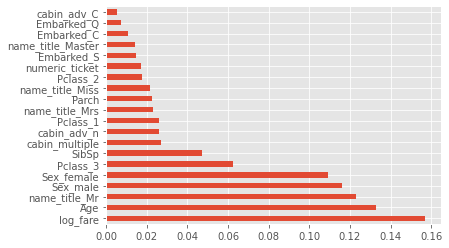

In [99]:
#Finding what the most important features were 

best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

### XGBoost (fine-tuned)

In [100]:
"""

xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}
"""

"\n\nxgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n"

In [101]:
#Grid Search

"""
clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)

clf_performance(best_clf_xgb,'XGB')
"""

"\nclf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\n\nbest_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)\n\nclf_performance(best_clf_xgb,'XGB')\n"

In [102]:
# Randomized Search

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)


best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)


clf_performance(best_clf_xgb_rnd,'XGB')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 288 is smaller than n_iter=1000. Running 288 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
XGB
Best_score: 0.817048521750047
Best Parameter: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [107]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [0],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)

clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best_score: 0.6161634548992531
Best Parameter: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 0, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}


In [108]:
#submission

y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)

xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}

submission_xgb = pd.DataFrame(data=xgb_submission)

submission_xgb.to_csv('xgb_submission3.csv', index=False)

# Model Additional Ensemble Approaches

1. Experimented with a hard voting classifier of three estimators (KNN, SVM, RF) (...%) 

2. Experimented with a soft voting classifier of three estimators (KNN, SVM, RF) (...%)

3. Experimented with soft voting on all estimators performing better than 80% except xgb (KNN, RF, LR, SVC) (...%)

4. Experimented with soft voting on all estimators including XGB (KNN, SVM, RF, LR, XGB) (...%)

In [109]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

In [110]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')


In [111]:
print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.79329609 0.82022472 0.8258427  0.80898876 0.83707865]
voting_clf_hard mean : 0.8170861841692298


In [112]:
print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

voting_clf_soft : [0.7877095  0.83146067 0.81460674 0.80337079 0.85955056]
voting_clf_soft mean : 0.8193396522503296


In [113]:

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

voting_clf_all : [0.80446927 0.83146067 0.82022472 0.81460674 0.86516854]
voting_clf_all mean : 0.8283095850856819


In [114]:
print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_xgb : [0.81564246 0.83707865 0.8258427  0.81460674 0.87640449]
voting_clf_xgb mean : 0.8339150084740444


## Weightings experimentation

In [115]:
#in a soft voting classifier you can weight some models more than others. 

#I used a grid search to explore different weightings

#no new results here

params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)

best_clf_weight = vote_weight.fit(X_train_scaled,y_train)

clf_performance(best_clf_weight,'VC Weights')

voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best_score: 0.8316552633230808
Best Parameter: {'weights': [2, 1, 1]}


 # Make Predictions

In [116]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=25,
                                                     max_features=10,
                                                     min_samples_leaf=3,
                                                     n_estimators=450,
                                                     random_state=1)),
                             ('svc', SVC(C=1, gamma=0.1, probability=True)),
                             ('xgb',
                              XGBClassifier(colsample_bytree=0.75, gamma=0.5,
                                            learning_rate=0.5, max_depth=0,
                                            min_child_weight=0.01,
                                            n_estimators=450, random_state=1,
                                            reg_al

In [117]:
best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

## Competition Submission

In [118]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}

In [119]:
comparison = pd.DataFrame(data=final_data_comp)

In [120]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [121]:
comparison.difference_hard_all.value_counts()

0    408
1     10
Name: difference_hard_all, dtype: int64

In [122]:
#prepare submission files 
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)